pkgs: networkx, pandas, matplotlib.pyploy
1. G=用nx构建DiGraph（有向图）
2. nodes=构建站点的dict，格式为{'一德路': {'pos': (113.25191720000001, 23.115652570000002)},...}
3. edges:构建断面距离dict，格式为{'一德路': {'文化公园': 925},...},转换为list,[('一德路', '海珠广场', 922),...]
3.5 不用dict也一样可以创建G。
4. 画图nx.draw_netwoekx(...), nx.draw_networx_edges(...)
5. 基于shape文件创建一个带node的G，还没有成功。 04/09/201
5.1  networkx的read_shp()有问题，可以用mpl来解决空间数据。06/09/2017


In [319]:
import networkx as nx
import pandas as pd

In [3]:
stations = pd.read_csv('data/station_location_utf8.txt', dtype={'line_id':str,
                                                               'station_id':str})
stations.head(3)

,line_id,station_id,name,wgs_lng,wgs_lat
0,01,01,西朗,113.226701,23.067951
1,01,02,坑口,113.227102,23.081592
2,01,03,花地湾,113.228712,23.089772


In [5]:
stations_sel = stations[[2,3,4]]

In [6]:
stations_sel.shape

(186, 3)

In [7]:
stations_sel.drop_duplicates().shape

(165, 3)

In [8]:
stations_sel = stations_sel.drop_duplicates().reset_index(drop=True)

In [9]:
stations_sel.head(3)

,name,wgs_lng,wgs_lat
0,西朗,113.226701,23.067951
1,坑口,113.227102,23.081592
2,花地湾,113.228712,23.089772


In [10]:
stations_sel=stations_sel.set_index('name')

In [11]:
stations_sel.head(3)

,wgs_lng,wgs_lat
name,,
西朗,113.226701,23.067951
坑口,113.227102,23.081592
花地湾,113.228712,23.089772


#### 生成stations的坐标dict 

In [12]:
stations_dict = stations_sel.to_dict(orient='index')

In [15]:
stations_dict.items()

dict_items([('西朗', {'wgs_lng': 113.22670100000001, 'wgs_lat': 23.06795116}), ('坑口', {'wgs_lng': 113.22710249999999, 'wgs_lat': 23.081591639999999}), ('花地湾', {'wgs_lng': 113.22871170000001, 'wgs_lat': 23.089772}), ('芳村', {'wgs_lng': 113.23032649999999, 'wgs_lat': 23.101230300000001}), ('黄沙', {'wgs_lng': 113.2351077, 'wgs_lat': 23.112579589999999}), ('长寿路', {'wgs_lng': 113.23675130000001, 'wgs_lat': 23.120920959999999}), ('陈家祠', {'wgs_lng': 113.240959, 'wgs_lat': 23.128363530000001}), ('西门口', {'wgs_lng': 113.25061699999999, 'wgs_lat': 23.127886090000001}), ('公园前', {'wgs_lng': 113.2588787, 'wgs_lat': 23.128097910000001}), ('农讲所', {'wgs_lng': 113.2700246, 'wgs_lat': 23.129277980000001}), ('烈士陵园', {'wgs_lng': 113.2804187, 'wgs_lat': 23.12927213}), ('东山口', {'wgs_lng': 113.2904216, 'wgs_lat': 23.126755930000002}), ('杨箕', {'wgs_lng': 113.3022, 'wgs_lat': 23.129999999999999}), ('体育西路', {'wgs_lng': 113.3160915, 'wgs_lat': 23.133715460000001}), ('体育中心', {'wgs_lng': 113.3229, 'wgs_lat': 23.1374}),

In [17]:
stations_dict['高增']

{'wgs_lat': 23.357500000000002, 'wgs_lng': 113.2901}

#### create Graph with stations_dict

In [18]:
G = nx.Graph()

In [19]:
# add node
G.add_nodes_from(stations_dict.keys())

In [22]:
for name, position in stations_dict.items():
    G.node[name] = position

In [29]:
# 添加的模式不对，先将数据删除
G.clear()

In [31]:
G.node

{}

In [34]:
# add node
G.add_nodes_from(stations_dict.keys())
for name, position in stations_dict.items():
    G.node[name]['pos'] = (position['wgs_lng'], position['wgs_lat'])

In [35]:
G.node

{'一德路': {'pos': (113.25191720000001, 23.115652570000002)},
 '万胜围': {'pos': (113.3792297, 23.100243330000001)},
 '三元里': {'pos': (113.2519034, 23.161895730000001)},
 '三溪': {'pos': (113.4103332, 23.106516110000001)},
 '世纪莲': {'pos': (113.10895249999999, 22.967765)},
 '东圃': {'pos': (113.39612509999999, 23.11191208)},
 '东山口': {'pos': (113.2904216, 23.126755930000002)},
 '东平': {'pos': (113.12371170000002, 22.967887040000001)},
 '东晓南': {'pos': (113.2890197, 23.0738509)},
 '东涌': {'pos': (113.47361840000001, 22.88825880000001)},
 '东湖': {'pos': (113.2841, 23.1173)},
 '中大': {'pos': (113.28774629999999, 23.094707329999999)},
 '中山八': {'pos': (113.22759019999999, 23.12817317)},
 '五山': {'pos': (113.3464249, 23.155115940000002)},
 '五羊邨': {'pos': (113.30889599999999, 23.122464770000001)},
 '京溪南方医院': {'pos': (113.32067109999998, 23.187821660000001)},
 '人和': {'pos': (113.29061850000001, 23.337902060000001)},
 '会江': {'pos': (113.28123899999999, 23.015508659999998)},
 '低涌': {'pos': (113.4794358, 22.9224238

In [36]:
pos_attr = nx.get_node_attributes(G, 'pos')

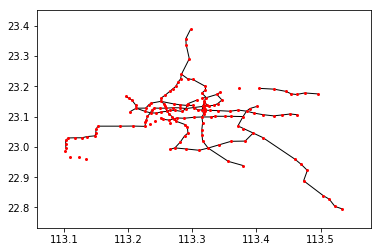

In [115]:
%matplotlib inline
nx.draw_networkx(G, pos_attr, with_labels=False, node_size=4)

### Create Network edges 

In [40]:
qingfen_info = pd.read_table('data/qingfen_sta_info.txt', encoding='gbk', sep=',', dtype=str)

In [41]:
qingfen_info.head(3)

,qingfen_id,line_station,line_id,station_id,name
0,001,0101,01,01,西朗
1,002,0102,01,02,坑口
2,003,0103,01,03,花地湾


In [52]:
# import json
# with open('data/df_distance_dict.json') as json_data:
#     qingfen_dis = json.load(json_data)

qingfen_dis = {'098': {'097': 1830.0}, '090': {'089': 1974.97}, '091': {'090': 902.44000000000005}, '092': {'091': 2411.2800000000002}, '093': {'092': 1193.72}, '094': {'093': 2432.8000000000002}, '095': {'094': 2374.1999999999998, '096': 1120.0}, '096': {'095': 1035.8800000000001}, '010': {'009': 1175.0}, '011': {'010': 1020.0}, '012': {'011': 1165.0, '135': 1368.5350000000001}, '013': {'069': 1153.069, '012': 1320.0}, '014': {'032': 1181.1610000000001, '013': 1430.0}, '015': {'014': 940.0}, '016': {'111': 1021.0, '015': 1870.0}, '017': {'047': 1828.0}, '018': {'017': 993.89999999999998}, '019': {'018': 1567.2}, '127': {'126': 805.60000000000002}, '138': {'137': 842.5}, '120': {'119': 984.98000000000002}, '024': {'088': 673.0, '023': 1189.2}, '027': {'132': 922.79499999999996, '026': 999.70000000000005}, '026': {'025': 1061.8}, '021': {'020': 1486.3, '034': 1178.99}, '020': {'019': 769.10000000000002}, '023': {'022': 1695.3}, '022': {'021': 1240.5}, '128': {'127': 809.68700000000001}, '129': {'128': 2159.5900000000001}, '029': {'028': 869.5}, '028': {'009': 785.89999999999998}, '133': {'027': 630.98699999999997}, '132': {'131': 925.72300000000007}, '131': {'005': 905.36899999999991}, '130': {'062': 1867.991}, '137': {'136': 990.0}, '136': {'068': 882.82100000000003}, '135': {'134': 1167.182}, '134': {'133': 875.14999999999998}, '144': {'143': 1619.0}, '115': {'114': 1152.0940000000001}, '114': {'113': 1301.2}, '038': {'037': 2238.0}, '039': {'038': 3050.5419999999999, '152': 1663.54}, '111': {'139': 646.05399999999997, '110': 1911.0}, '110': {'109': 1329.0}, '113': {'112': 1511.8}, '032': {'016': 1107.0}, '033': {'014': 1283.8410000000001, '070': 714.41399999999999}, '030': {'065': 1717.0970000000002, '029': 1098.0}, '031': {'030': 1220.9000000000001, '087': 1373.5999999999999}, '036': {'035': 2647.1999999999998}, '037': {'036': 1815.0}, '034': {'033': 1479.8710000000001}, '035': {'021': 2057.4829999999997}, '108': {'107': 3398.5929999999998}, '109': {'108': 1371.0}, '148': {'147': 951.0}, '049': {'048': 1421.5}, '048': {'047': 3681.5}, '047': {'060': 2160.5999999999999}, '046': {'014': 1563.1610000000001}, '045': {'046': 821.79999999999995}, '044': {'045': 889.20000000000005}, '043': {'044': 1554.0}, '042': {'043': 2360.0, '111': 2214.069}, '041': {'040': 3743.8940000000002}, '040': {'039': 6163.835}, '139': {'138': 1244.5}, '151': {'095': 1907.713}, '150': {'149': 2101.0}, '153': {'039': 2219.46}, '152': {'151': 2147.0}, '058': {'057': 3032.0}, '059': {'058': 1960.0}, '054': {'053': 2452.0}, '055': {'054': 3942.9000000000001}, '056': {'055': 6435.0}, '057': {'056': 1544.0999999999999}, '050': {'155': 3778.373, '049': 2140.5}, '051': {'050': 2290.0}, '052': {'051': 9746.0}, '053': {'052': 2251.2660000000001}, '101': {'100': 1053.0}, '157': {'156': 2595.0}, '106': {'105': 5391.4869999999992}, '145': {'144': 2298.0}, '104': {'103': 3544.5959999999995, '163': 5629.7380000000003}, '105': {'104': 2434.0}, '060': {'098': 1185.9000000000001, '074': 1375.6089999999999}, '063': {'062': 1617.366}, '062': {'061': 1637.9000000000001, '129': 1180.902}, '065': {'064': 717.89999999999998}, '064': {'063': 1390.4000000000001}, '067': {'066': 1064.2}, '066': {'030': 2207.23}, '069': {'068': 1075.4000000000001}, '068': {'012': 1309.5639999999999, '067': 1056.173}, '160': {'159': 1182.027}, '161': {'160': 1857.6689999999999}, '162': {'161': 1636.0}, '163': {'162': 2787.0}, '117': {'116': 1066.4000000000001}, '116': {'115': 1114.1869999999999}, '076': {'075': 1599.5429999999999}, '077': {'076': 1757.4000000000001}, '074': {'073': 1466.134}, '075': {'060': 1360.4929999999999}, '072': {'071': 1374.0}, '073': {'072': 1881.0}, '070': {'013': 1111.22}, '071': {'033': 1155.6669999999999}, '159': {'158': 1238.0}, '158': {'157': 2218.2080000000001}, '078': {'077': 1539.3770000000002}, '079': {'078': 1376.2820000000002}, '100': {'099': 833.92999999999995}, '149': {'148': 1394.9939999999999}, '119': {'118': 1358.9770000000001}, '118': {'117': 985.23399999999992}, '155': {'154': 2406.2289999999998}, '146': {'145': 2176.0}, '147': {'146': 1363.0}, '089': {'088': 905.5}, '088': {'025': 817.89999999999998, '101': 839.70000000000005}, '142': {'141': 1475.0}, '143': {'142': 1941.5799999999999}, '140': {'042': 989.471}, '141': {'140': 2120.5940000000001}, '083': {'082': 1237.0}, '082': {'081': 1764.0}, '081': {'106': 6287.3069999999998, '125': 2123.8360000000002}, '080': {'079': 1094.0260000000001}, '087': {'086': 1531.0}, '086': {'085': 1010.0}, '085': {'084': 1154.0}, '084': {'083': 1432.0}, '003': {'002': 930.0}, '002': {'001': 1520.0}, '001': {'124': 2040.0}, '007': {'006': 1150.0}, '006': {'005': 950.0}, '005': {'130': 1219.462, '004': 1380.0}, '004': {'003': 1330.0}, '154': {'153': 2262.2170000000001}, '009': {'027': 1268.9000000000001, '008': 875.0}, '008': {'007': 940.0}, '121': {'120': 1369.27}, '122': {'121': 1422.579}, '123': {'122': 3473.3440000000001}, '124': {'123': 2129.4029999999998}, '125': {'107': 953.39999999999998}}

In [60]:
# 使用另外一个txt文件
qingfen_dis = pd.read_table('data/station_distance.TXT',header=None, names = ['qingfen_id1','qingfen_id2','distance'],
                           dtype = {'qingfen_id1':str, 'qingfen_id2':str})

In [61]:
qingfen_dis.head(3)

,qingfen_id1,qingfen_id2,distance
0,002,003,930.0
1,003,004,1330.0
2,004,005,1380.0


In [62]:
qingfen_info = qingfen_info[[0,-1]] # 选取qingfen_info的name列

In [63]:
qingfen_info.shape

(169, 2)

In [64]:
qingfen_info.drop_duplicates().shape

(151, 2)

In [70]:
qingfen_info.loc[qingfen_info.duplicated(),]

,qingfen_id,name
22,014,体育西路
41,016,广州东站
54,009,公园前
60,030,广州火车站
65,013,杨箕
67,033,珠江新城
103,021,客村
129,001,西朗
135,062,坦尾
137,005,黄沙


In [74]:
qingfen_info = qingfen_info.drop_duplicates()

In [76]:
# merge qingfen_info with qingfen_dis
pd.merge(qingfen_dis, qingfen_info,left_on='qingfen_id1', right_on='qingfen_id')

,qingfen_id1,qingfen_id2,distance,qingfen_id,name
0,002,003,930.000,002,坑口
1,003,004,1330.000,003,花地湾
2,004,005,1380.000,004,芳村
3,005,006,950.000,005,黄沙
4,005,131,905.369,005,黄沙
5,006,007,1150.000,006,长寿路
6,007,008,940.000,007,陈家祠
7,008,009,875.000,008,西门口
8,009,010,1175.000,009,公园前
9,009,028,785.900,009,公园前


In [77]:
df = pd.merge(qingfen_dis, qingfen_info,left_on='qingfen_id1', right_on='qingfen_id')

In [78]:
pd.merge(df, qingfen_info,left_on='qingfen_id2', right_on='qingfen_id')

,qingfen_id1,qingfen_id2,distance,qingfen_id_x,name_x,qingfen_id_y,name_y
0,002,003,930.000,002,坑口,003,花地湾
1,003,004,1330.000,003,花地湾,004,芳村
2,004,005,1380.000,004,芳村,005,黄沙
3,130,005,1219.462,130,如意坊,005,黄沙
4,005,006,950.000,005,黄沙,006,长寿路
5,005,131,905.369,005,黄沙,131,文化公园
6,006,007,1150.000,006,长寿路,007,陈家祠
7,007,008,940.000,007,陈家祠,008,西门口
8,008,009,875.000,008,西门口,009,公园前
9,027,009,1268.900,027,海珠广场,009,公园前


In [79]:
df = pd.merge(df, qingfen_info,left_on='qingfen_id2', right_on='qingfen_id')

In [80]:
df.shape

(162, 7)

In [81]:
df_sel = df[[4,6,2]]
df_sel.head(3)

,name_x,name_y,distance
0,坑口,花地湾,930.0
1,花地湾,芳村,1330.0
2,芳村,黄沙,1380.0


In [82]:
!pip list -o

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.python.org', port=443): Read timed out. (read timeout=15)",)': /simple/xlrd/
Could not fetch URL https://pypi.python.org/simple/xlrd/: There was a problem confirming the ssl certificate: EOF occurred in violation of protocol (_ssl.c:749) - skipping
^C
Operation cancelled by user


In [83]:
df_sel.pivot_table(index = 'name_x', columns='name_y', values='distance')

name_y,一德路,万胜围,三元里,三溪,东圃,东山口,东晓南,东涌,东湖,中大,...,鱼珠,鹭江,黄沙,黄花岗,黄边,黄阁,黄阁汽车城,黄陂,龙归,龙溪
name_x,,,,,,,,,,,,,,,,,,,,,
一德路,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
万胜围,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
三溪,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1757.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
东圃,NaN,NaN,NaN,1599.543,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
东山口,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
东晓南,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
东涌,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6435.0,NaN,NaN,NaN
东湖,NaN,NaN,NaN,NaN,NaN,1368.535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
中大,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_sel_pivoted = df_sel.pivot_table(index = 'name_x', columns='name_y', values='distance')

In [92]:
df_sel_pivoted.to_dict()

{'一德路': {'一德路': nan,
  '万胜围': nan,
  '三溪': nan,
  '东圃': nan,
  '东山口': nan,
  '东晓南': nan,
  '东涌': nan,
  '东湖': nan,
  '中大': nan,
  '中山八': nan,
  '五山': nan,
  '五羊邨': nan,
  '京溪南方医院': nan,
  '人和': nan,
  '会江': nan,
  '低涌': nan,
  '体育中心': nan,
  '体育西路': nan,
  '公园前': nan,
  '农讲所': nan,
  '凤凰新村': nan,
  '动物园': nan,
  '北京路': nan,
  '区庄': nan,
  '千灯湖': nan,
  '华师': nan,
  '南村万博': nan,
  '南桂路': nan,
  '南洲': nan,
  '南浦': nan,
  '厦滘': nan,
  '同和': nan,
  '同济路': nan,
  '员岗': nan,
  '员村': nan,
  '嘉禾望岗': nan,
  '团一大广场': nan,
  '坑口': nan,
  '坦尾': nan,
  '大塘': nan,
  '大学城北': nan,
  '大学城南': nan,
  '大沙东': nan,
  '大沙地': nan,
  '大石': nan,
  '天平架': nan,
  '天河客运站': nan,
  '如意坊': nan,
  '季华园': nan,
  '官洲': nan,
  '宝岗大道': nan,
  '客村': nan,
  '小北': nan,
  '岗顶': nan,
  '市二宫': nan,
  '市桥': nan,
  '广州东站': nan,
  '广州南站': nan,
  '广州塔': nan,
  '广州火车站': nan,
  '文化公园': 925.72300000000007,
  '新港东': nan,
  '新造': nan,
  '昌岗': nan,
  '普君北路': nan,
  '暹岗': nan,
  '朝安': nan,
  '机场南': nan,
  '杨箕': nan,
  '板桥': nan,
  '林和西': 

In [93]:
df_sel_dict = df_sel_pivoted.to_dict()

In [94]:
# 处理空值字典
from math import isnan

In [95]:
for key in df_sel_dict.keys():
    df_sel_dict[key] = dict((k,v) for k,v in df_sel_dict[key].items() if not isnan(v))

In [96]:
df_sel_dict

{'一德路': {'文化公园': 925.72300000000007},
 '万胜围': {'车陂南': 2160.5999999999999},
 '三元里': {'广州火车站': 1220.9000000000001, '飞翔公园': 1373.5999999999999},
 '三溪': {'东圃': 1599.5429999999999},
 '东圃': {'车陂南': 1360.4929999999999},
 '东山口': {'东湖': 1368.5350000000001, '烈士陵园': 1165.0},
 '东晓南': {'江泰路': 1974.97},
 '东涌': {'低涌': 3942.9000000000001},
 '东湖': {'团一大广场': 1167.182},
 '中大': {'鹭江': 1695.3},
 '中山八': {'坦尾': 1617.366},
 '五山': {'华师': 1554.0},
 '五羊邨': {'杨箕': 1111.22},
 '京溪南方医院': {'同和': 1371.0},
 '人和': {'高增': 2434.0},
 '会江': {'南浦': 2432.8000000000002},
 '低涌': {'海傍': 2452.0},
 '体育中心': {'体育西路': 940.0},
 '体育西路': {'杨箕': 1430.0, '林和西': 1181.1610000000001},
 '公园前': {'海珠广场': 1268.9000000000001, '西门口': 875.0},
 '农讲所': {'公园前': 1175.0},
 '动物园': {'区庄': 1075.4000000000001},
 '北京路': {'海珠广场': 630.98699999999997},
 '区庄': {'东山口': 1309.5639999999999, '淘金': 1056.173},
 '千灯湖': {'虫雷岗': 1369.27},
 '华师': {'岗顶': 889.20000000000005},
 '南村万博': {'汉溪长隆': 2219.46},
 '南桂路': {'桂城': 1358.9770000000001},
 '南洲': {'东晓南': 902.44000000000005},

In [97]:
for k1 in df_sel_dict.keys():
    for k2 in df_sel_dict[k1]:
        df_sel_dict[k1][k2] = int(df_sel_dict[k1][k2])

In [98]:
df_sel_dict

{'一德路': {'文化公园': 925},
 '万胜围': {'车陂南': 2160},
 '三元里': {'广州火车站': 1220, '飞翔公园': 1373},
 '三溪': {'东圃': 1599},
 '东圃': {'车陂南': 1360},
 '东山口': {'东湖': 1368, '烈士陵园': 1165},
 '东晓南': {'江泰路': 1974},
 '东涌': {'低涌': 3942},
 '东湖': {'团一大广场': 1167},
 '中大': {'鹭江': 1695},
 '中山八': {'坦尾': 1617},
 '五山': {'华师': 1554},
 '五羊邨': {'杨箕': 1111},
 '京溪南方医院': {'同和': 1371},
 '人和': {'高增': 2434},
 '会江': {'南浦': 2432},
 '低涌': {'海傍': 2452},
 '体育中心': {'体育西路': 940},
 '体育西路': {'杨箕': 1430, '林和西': 1181},
 '公园前': {'海珠广场': 1268, '西门口': 875},
 '农讲所': {'公园前': 1175},
 '动物园': {'区庄': 1075},
 '北京路': {'海珠广场': 630},
 '区庄': {'东山口': 1309, '淘金': 1056},
 '千灯湖': {'虫雷岗': 1369},
 '华师': {'岗顶': 889},
 '南村万博': {'汉溪长隆': 2219},
 '南桂路': {'桂城': 1358},
 '南洲': {'东晓南': 902},
 '南浦': {'洛溪': 1193},
 '厦滘': {'沥滘': 1815},
 '同和': {'永泰': 3398},
 '同济路': {'季华园': 1301},
 '员岗': {'南村万博': 2262},
 '员村': {'潭村': 1881},
 '嘉禾望岗': {'白云大道北': 2123, '龙归': 6287},
 '团一大广场': {'北京路': 875},
 '坑口': {'西朗': 1520},
 '坦尾': {'河沙': 1180, '滘口': 1637},
 '大塘': {'客村': 2057},
 '大学城北': {'官洲': 14

### Add Edges to Graph

In [100]:
edges = []
for key in df_sel_dict.keys():
    [edges.append((key, k,v)) for k,v in df_sel_dict[key].items()]

In [103]:
len(df_sel_dict.keys())

140

In [104]:
edges[1]

('万胜围', '车陂南', 2160)

In [105]:
G.add_weighted_edges_from(edges)

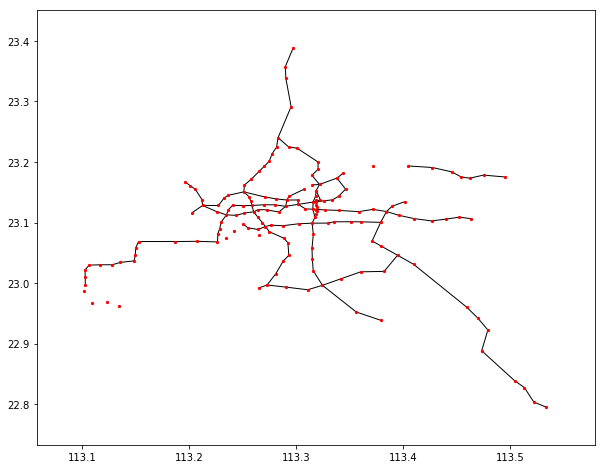

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
nx.draw_networkx(G, pos_attr, node_size=5, with_labels=False)

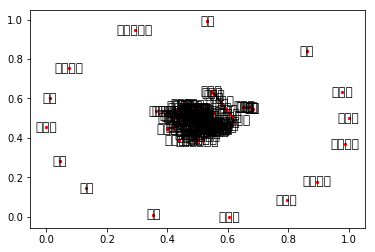

In [108]:
nx.draw_networkx(G,node_size=5)

In [109]:
G.edges(data=True)

[('西朗', '坑口', {'weight': 1520}),
 ('西朗', '菊树', {'weight': 2040}),
 ('坑口', '花地湾', {'weight': 930}),
 ('花地湾', '芳村', {'weight': 1330}),
 ('芳村', '黄沙', {'weight': 1380}),
 ('黄沙', '文化公园', {'weight': 905}),
 ('黄沙', '长寿路', {'weight': 950}),
 ('黄沙', '如意坊', {'weight': 1219}),
 ('长寿路', '陈家祠', {'weight': 1150}),
 ('陈家祠', '西门口', {'weight': 940}),
 ('西门口', '公园前', {'weight': 875}),
 ('公园前', '海珠广场', {'weight': 1268}),
 ('公园前', '农讲所', {'weight': 1175}),
 ('公园前', '纪念堂', {'weight': 785}),
 ('农讲所', '烈士陵园', {'weight': 1020}),
 ('烈士陵园', '东山口', {'weight': 1165}),
 ('东山口', '东湖', {'weight': 1368}),
 ('东山口', '区庄', {'weight': 1309}),
 ('东山口', '杨箕', {'weight': 1320}),
 ('杨箕', '五羊邨', {'weight': 1111}),
 ('杨箕', '体育西路', {'weight': 1430}),
 ('杨箕', '动物园', {'weight': 1153}),
 ('体育西路', '体育中心', {'weight': 940}),
 ('体育西路', '林和西', {'weight': 1181}),
 ('体育西路', '珠江新城', {'weight': 1283}),
 ('体育西路', '石牌桥', {'weight': 1563}),
 ('体育中心', '广州东站', {'weight': 1870}),
 ('广州东站', '燕塘', {'weight': 1021}),
 ('广州东站', '林和西', {'weight': 110

In [110]:
G.number_of_nodes()

165

In [111]:
G.number_of_edges()

161

### 分析线网-最短路径

In [121]:
route = nx.shortest_path(G, '东山口', '机场南', weight='weight')

In [122]:
route_edges = list(zip(route, route[1:]))

In [123]:
route_edges

[('东山口', '区庄'),
 ('区庄', '淘金'),
 ('淘金', '小北'),
 ('小北', '广州火车站'),
 ('广州火车站', '三元里'),
 ('三元里', '飞翔公园'),
 ('飞翔公园', '白云公园'),
 ('白云公园', '白云文化广场'),
 ('白云文化广场', '萧岗'),
 ('萧岗', '江夏'),
 ('江夏', '黄边'),
 ('黄边', '嘉禾望岗'),
 ('嘉禾望岗', '龙归'),
 ('龙归', '人和'),
 ('人和', '高增'),
 ('高增', '机场南')]

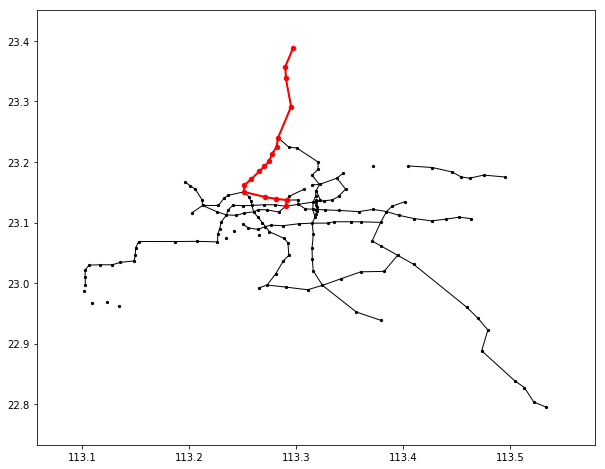

In [138]:
plt.figure(figsize=(10,8))
nx.draw_networkx(G, pos_attr, node_color='k', node_size=5, with_labels=False)
nx.draw_networkx_nodes(G, pos_attr, nodelist=route, node_color='r', node_size=20)
nx.draw_networkx_edges(G, pos_attr, edgelist=route_edges, edge_color='r', width=2, arrows=True)
plt.show()

In [131]:
nx.shortest_path_length(G, '东山口','机场南', weight='weight')

34013

### try to do something else 

In [261]:
G2.clear()
G2 = nx.DiGraph()

In [140]:
stations_sel.head()

,wgs_lng,wgs_lat
name,,
西朗,113.226701,23.067951
坑口,113.227102,23.081592
花地湾,113.228712,23.089772
芳村,113.230326,23.101230
黄沙,113.235108,23.112580


In [262]:
G2.add_nodes_from(stations_sel.index)

In [263]:
for i in stations_sel.index:
    pos = stations_sel.loc[i]
    G2.node[i]['pos'] = (pos[0], pos[1])

In [264]:
nx.get_node_attributes(G2, 'pos')

{'一德路': (113.25191720000001, 23.115652570000002),
 '万胜围': (113.3792297, 23.100243330000001),
 '三元里': (113.2519034, 23.161895730000001),
 '三溪': (113.4103332, 23.106516110000001),
 '世纪莲': (113.10895249999999, 22.967765),
 '东圃': (113.39612509999999, 23.11191208),
 '东山口': (113.2904216, 23.126755930000002),
 '东平': (113.12371170000002, 22.967887040000001),
 '东晓南': (113.2890197, 23.0738509),
 '东涌': (113.47361840000001, 22.88825880000001),
 '东湖': (113.2841, 23.1173),
 '中大': (113.28774629999999, 23.094707329999999),
 '中山八': (113.22759019999999, 23.12817317),
 '五山': (113.3464249, 23.155115940000002),
 '五羊邨': (113.30889599999999, 23.122464770000001),
 '京溪南方医院': (113.32067109999998, 23.187821660000001),
 '人和': (113.29061850000001, 23.337902060000001),
 '会江': (113.28123899999999, 23.015508659999998),
 '低涌': (113.4794358, 22.922423850000001),
 '体育中心': (113.3229, 23.1374),
 '体育中心南': (113.3185, 23.136700000000001),
 '体育西路': (113.3160915, 23.133715460000001),
 '公园前': (113.2588787, 23.128097910000001),


In [265]:
stations_sel.index[2]

'花地湾'

In [266]:
df_sel.head()

,name_x,name_y,distance
0,坑口,花地湾,930
1,花地湾,芳村,1330
2,芳村,黄沙,1380
3,如意坊,黄沙,1219
4,黄沙,长寿路,950


In [267]:
df_sel.iloc[1][0]

'花地湾'

In [268]:
df_sel['distance'] = df_sel['distance'].astype(int)

/Users/weizheng/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [269]:
edges1 = [(df_sel.iloc[i][0],df_sel.iloc[i][1],df_sel.iloc[i][2]) for i in range(len(df_sel))]

In [270]:
edges1

[('坑口', '花地湾', 930),
 ('花地湾', '芳村', 1330),
 ('芳村', '黄沙', 1380),
 ('如意坊', '黄沙', 1219),
 ('黄沙', '长寿路', 950),
 ('黄沙', '文化公园', 905),
 ('长寿路', '陈家祠', 1150),
 ('陈家祠', '西门口', 940),
 ('西门口', '公园前', 875),
 ('海珠广场', '公园前', 1268),
 ('公园前', '农讲所', 1175),
 ('公园前', '纪念堂', 785),
 ('农讲所', '烈士陵园', 1020),
 ('烈士陵园', '东山口', 1165),
 ('东湖', '东山口', 1368),
 ('东山口', '杨箕', 1320),
 ('动物园', '杨箕', 1153),
 ('东山口', '区庄', 1309),
 ('淘金', '区庄', 1056),
 ('杨箕', '体育西路', 1430),
 ('林和西', '体育西路', 1181),
 ('杨箕', '五羊邨', 1111),
 ('体育西路', '体育中心', 940),
 ('体育西路', '珠江新城', 1283),
 ('五羊邨', '珠江新城', 714),
 ('体育西路', '石牌桥', 1563),
 ('体育中心', '广州东站', 1870),
 ('燕塘', '广州东站', 1021),
 ('万胜围', '琶洲', 1828),
 ('万胜围', '官洲', 3681),
 ('琶洲', '新港东', 993),
 ('新港东', '磨碟沙', 1567),
 ('磨碟沙', '赤岗', 769),
 ('赤岗', '客村', 1486),
 ('广州塔', '客村', 1178),
 ('客村', '鹭江', 1240),
 ('客村', '大塘', 2057),
 ('鹭江', '中大', 1695),
 ('中大', '晓港', 1189),
 ('昌岗', '晓港', 673),
 ('江南西', '市二宫', 1061),
 ('江南西', '昌岗', 817),
 ('宝岗大道', '昌岗', 839),
 ('市二宫', '海珠广场', 999),
 ('一德路', '海珠广场', 922

In [271]:
edges2 = [(df_sel.iloc[i][1],df_sel.iloc[i][0],df_sel.iloc[i][2]) for i in range(len(df_sel))]

In [272]:
# add edges to DiGraph G2
G2.add_weighted_edges_from(edges1)
G2.add_weighted_edges_from(edges2)

In [273]:
G2.number_of_edges()

322

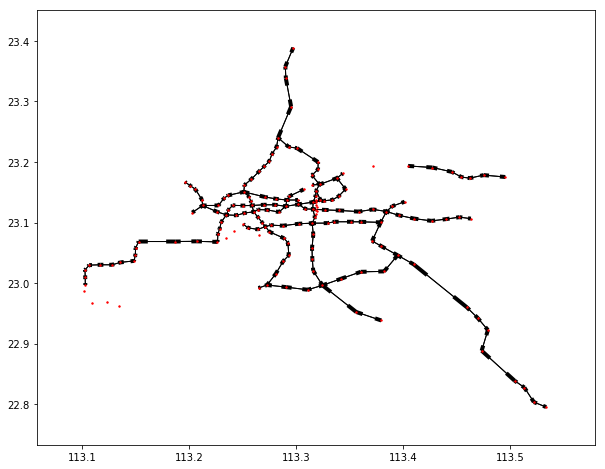

In [274]:
plt.figure(figsize=(10,8))
nx.draw_networkx(G2,pos_attr, with_labels=False, node_size=2, arrows=True)

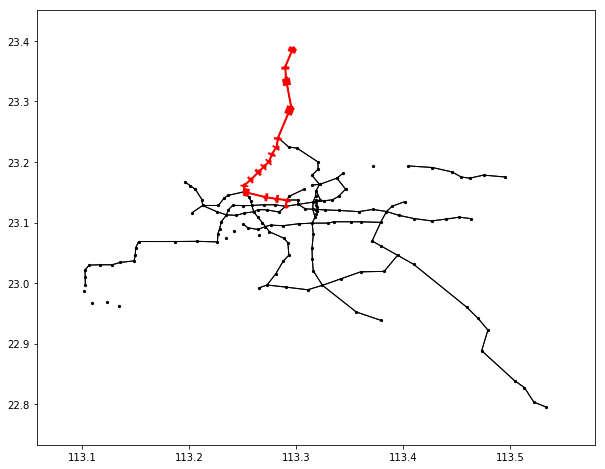

In [275]:
plt.figure(figsize=(10,8))
nx.draw_networkx(G2, pos_attr, node_color='k', node_size=5, with_labels=False, arrows=False)
nx.draw_networkx_nodes(G2, pos_attr, nodelist=route, node_color='r', node_size=10)
nx.draw_networkx_edges(G2, pos_attr, edgelist=route_edges, edge_color='r', width=2, arrows=True)
plt.show()

In [276]:
nx.shortest_path_length(G2, '东山口','机场南')

15

In [277]:
paths = nx.all_simple_paths(G2, '东山口','机场南')

In [278]:
for path in paths:
    if len(path) <=18:
        print (len(path), path)

16 ['东山口', '杨箕', '体育西路', '体育中心', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
16 ['东山口', '杨箕', '体育西路', '林和西', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
18 ['东山口', '杨箕', '五羊邨', '珠江新城', '体育西路', '体育中心', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
18 ['东山口', '杨箕', '五羊邨', '珠江新城', '体育西路', '林和西', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
18 ['东山口', '区庄', '动物园', '杨箕', '体育西路', '体育中心', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
18 ['东山口', '区庄', '动物园', '杨箕', '体育西路', '林和西', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
17 ['东山口', '区庄', '淘金', '小北', '广州火车站', '三元里', '飞翔公园', '白云公园', '白云文化广场', '萧岗', '江夏', '黄边', '嘉禾望岗', '龙归', '人和', '高增', '机场南']


In [279]:
nx.shortest_path_length(G2, '文冲','公园前')

17

In [280]:
nx.shortest_path(G2, '文冲','公园前')

['文冲',
 '大沙东',
 '大沙地',
 '鱼珠',
 '三溪',
 '东圃',
 '车陂南',
 '科韵路',
 '员村',
 '潭村',
 '猎德',
 '珠江新城',
 '体育西路',
 '杨箕',
 '东山口',
 '烈士陵园',
 '农讲所',
 '公园前']

In [281]:
nx.shortest_path(G2, '万胜围','公园前')

['万胜围',
 '车陂南',
 '科韵路',
 '员村',
 '潭村',
 '猎德',
 '珠江新城',
 '体育西路',
 '杨箕',
 '东山口',
 '烈士陵园',
 '农讲所',
 '公园前']

In [282]:
nx.all_shortest_paths(G,'万胜围','公园前', weight='weight')

<generator object all_shortest_paths at 0x114a742b0>

In [283]:
print([p for p in nx.all_shortest_paths(G,'万胜围','公园前', weight='weight')])

[['万胜围', '琶洲', '新港东', '磨碟沙', '赤岗', '客村', '鹭江', '中大', '晓港', '昌岗', '江南西', '市二宫', '海珠广场', '公园前']]


### eppstein K条路径算法

In [284]:
import eppstein_py3

In [285]:
def create_guangzhou_eps(graph, start_station, end_station):
    graph.add_node('s', name="source", index='s')
    graph.add_node('t', name="destination", index='t')

    # add edges,
    # beginning with start and end
    start = start_station
    end = end_station
    #
    edges = []
    edges.append(('s', start, 0))
    edges.append((end, 't', 0))
    graph.add_weighted_edges_from(edges)
#     return graph

    e = eppstein_py3.EppsteinShortestPathAlgorithm(graph)
    e._pre_process()
    counter =0
    for cost, sol in e.get_successive_shortest_paths():
        counter += 1
        if counter == 4:
            break
        print (cost, sol)

In [308]:
G2.remove_node('s')
G2.remove_node('t')
create_guangzhou_eps(G2, '东山口', '天河客运站')

Mon Sep  4 17:40:37 2017 started
total_nodes 167 total_edges 324
Mon Sep  4 17:40:37 2017 reverse_pred, & dist by using bellman ford 
Mon Sep  4 17:40:37 2017 all shortest paths completed
Mon Sep  4 17:40:37 2017 Initialization has been done
8273 [('s', '东山口'), ('东山口', '杨箕'), ('杨箕', '体育西路'), ('体育西路', '林和西'), ('林和西', '广州东站'), ('广州东站', '燕塘'), ('燕塘', '天河客运站'), ('天河客运站', 't')]
8795 [('s', '东山口'), ('东山口', '杨箕'), ('杨箕', '体育西路'), ('体育西路', '体育中心'), ('体育中心', '广州东站'), ('广州东站', '燕塘'), ('燕塘', '天河客运站'), ('天河客运站', 't')]
9565 [('s', '东山口'), ('东山口', '杨箕'), ('杨箕', '体育西路'), ('体育西路', '林和西'), ('林和西', '广州东站'), ('广州东站', '燕塘'), ('燕塘', '天河客运站'), ('天河客运站', 't')]


In [310]:
for path in nx.all_simple_paths(G2,'东山口', '天河客运站',cutoff= nx.shortest_path_length(G2,'东山口', '天河客运站')+2):
    print(path)

['东山口', '杨箕', '体育西路', '体育中心', '广州东站', '燕塘', '天河客运站']
['东山口', '杨箕', '体育西路', '石牌桥', '岗顶', '华师', '五山', '天河客运站']
['东山口', '杨箕', '体育西路', '林和西', '广州东站', '燕塘', '天河客运站']
['东山口', '杨箕', '五羊邨', '珠江新城', '体育西路', '体育中心', '广州东站', '燕塘', '天河客运站']
['东山口', '杨箕', '五羊邨', '珠江新城', '体育西路', '林和西', '广州东站', '燕塘', '天河客运站']
['东山口', '区庄', '动物园', '杨箕', '体育西路', '体育中心', '广州东站', '燕塘', '天河客运站']
['东山口', '区庄', '动物园', '杨箕', '体育西路', '林和西', '广州东站', '燕塘', '天河客运站']


In [303]:
G2.edges()

[('西朗', '坑口'),
 ('西朗', '菊树'),
 ('坑口', '花地湾'),
 ('坑口', '西朗'),
 ('花地湾', '芳村'),
 ('花地湾', '坑口'),
 ('芳村', '黄沙'),
 ('芳村', '花地湾'),
 ('黄沙', '长寿路'),
 ('黄沙', '文化公园'),
 ('黄沙', '芳村'),
 ('黄沙', '如意坊'),
 ('长寿路', '陈家祠'),
 ('长寿路', '黄沙'),
 ('陈家祠', '西门口'),
 ('陈家祠', '长寿路'),
 ('西门口', '公园前'),
 ('西门口', '陈家祠'),
 ('公园前', '农讲所'),
 ('公园前', '纪念堂'),
 ('公园前', '西门口'),
 ('公园前', '海珠广场'),
 ('农讲所', '烈士陵园'),
 ('农讲所', '公园前'),
 ('烈士陵园', '东山口'),
 ('烈士陵园', '农讲所'),
 ('东山口', '杨箕'),
 ('东山口', '区庄'),
 ('东山口', '烈士陵园'),
 ('东山口', '东湖'),
 ('杨箕', '体育西路'),
 ('杨箕', '五羊邨'),
 ('杨箕', '东山口'),
 ('杨箕', '动物园'),
 ('体育西路', '体育中心'),
 ('体育西路', '珠江新城'),
 ('体育西路', '石牌桥'),
 ('体育西路', '杨箕'),
 ('体育西路', '林和西'),
 ('体育中心', '广州东站'),
 ('体育中心', '体育西路'),
 ('广州东站', '林和西'),
 ('广州东站', '体育中心'),
 ('广州东站', '燕塘'),
 ('江南西', '市二宫'),
 ('江南西', '昌岗'),
 ('市二宫', '海珠广场'),
 ('市二宫', '江南西'),
 ('海珠广场', '公园前'),
 ('海珠广场', '北京路'),
 ('海珠广场', '市二宫'),
 ('海珠广场', '一德路'),
 ('纪念堂', '越秀公园'),
 ('纪念堂', '公园前'),
 ('越秀公园', '广州火车站'),
 ('越秀公园', '纪念堂'),
 ('广州火车站', '三元里'),
 ('广州火车站', '小北'),
 ('广州火车

In [313]:
df_sel.to_csv('data/df_sel_ouput.txt', index=False)

### with osmnx 

In [315]:
import osmnx as ox

Found GEOS DLL: <CDLL '/Users/weizheng/anaconda/lib/python3.6/site-packages/shapely/.dylibs/libgeos_c.1.dylib', handle 7f92172d1d10 at 0x11619bac8>, using it.
Trying `CDLL(/usr/lib/libc.dylib)`
Library path: '/usr/lib/libc.dylib'
DLL: <CDLL '/usr/lib/libc.dylib', handle 1168bcd20 at 0x11619b128>


In [316]:
# projected 
G_projected = ox.project_graph(G2)

KeyError: 'crs'

In [338]:
G3 = nx.read_shp('/Users/weizheng/RStudio/shinyApp/08_od_plot/data/guangzhou_metro_osm2017.shp')

ImportError: read_shp requires OGR: http://www.gdal.org/

In [337]:
G2

In [ ]:
conda search gdal
